# Load Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset

## Load Data

In [4]:
data_path = '../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv'

In [5]:
df = pd.read_csv(data_path, na_values=-1)

## View data summary

In [20]:
# Check dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (61352, 20)


In [21]:
# Display the first few rows of the dataset
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2.0,46.0,8.0,3,0,0,0.0,0.0,0.0,9.0,1.0,9.0,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1.0,30.0,6.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2.0,58.0,9.0,3,0,0,0.0,0.0,0.0,9.0,1.0,10.0,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2.0,78.0,11.0,3,0,0,0.0,0.0,0.0,9.0,2.0,10.0,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1.0,63.0,9.0,3,0,0,0.0,0.0,0.0,9.0,3.0,7.0,W01000578


In [22]:
df.tail()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2.0,56.0,9.0,3,10,9,0.0,0.0,0.0,0.0,1.0,10.0,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1.0,14.0,3.0,2,5,9,0.0,0.0,0.0,0.0,NaN,NaN,NaN
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1.0,42.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,5.0,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2.0,40.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,3.0,E01024497
61351,Unvalidated,2022461159841,2022,461159841,2,1,1,1.0,71.0,10.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01016025


In [24]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              61352 non-null  object 
 1   accident_index                      61352 non-null  object 
 2   accident_year                       61352 non-null  int64  
 3   accident_reference                  61352 non-null  object 
 4   vehicle_reference                   61352 non-null  int64  
 5   casualty_reference                  61352 non-null  int64  
 6   casualty_class                      61352 non-null  int64  
 7   sex_of_casualty                     60904 non-null  float64
 8   age_of_casualty                     60002 non-null  float64
 9   age_band_of_casualty                60002 non-null  float64
 10  casualty_severity                   61352 non-null  int64  
 11  pedestrian_location                 61352

In [25]:
# Check for missing values
# (-1: Missing or Out of Range)
df.isnull().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                      8027
dtype: int64

In [26]:
df.describe(include='all')

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
count,61352,61352,61352.0,61352,61352.000000,61352.000000,61352.000000,60904.000000,60002.000000,60002.000000,61352.000000,61352.000000,61352.000000,61038.000000,61329.000000,61239.000000,61347.000000,55854.000000,55568.000000,53325
unique,1,48283,NaN,48283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23840
top,Unvalidated,2022010356595,NaN,010356595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E01019456
freq,61352,16,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,NaN,NaN,2022.0,NaN,1.450368,1.333779,1.482299,1.386214,37.517866,6.452135,2.783039,0.800316,0.645325,0.228333,0.048900,0.034765,9.476013,1.296863,4.893266,NaN
std,NaN,NaN,0.0,NaN,1.109855,0.981507,0.735614,0.496238,18.950720,2.231875,0.442318,2.197167,2.009611,0.610414,0.426015,0.257770,16.663137,0.650865,2.782122,NaN
min,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
25%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,NaN
50%,NaN,NaN,2022.0,NaN,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000,NaN
75%,NaN,NaN,2022.0,NaN,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000,NaN


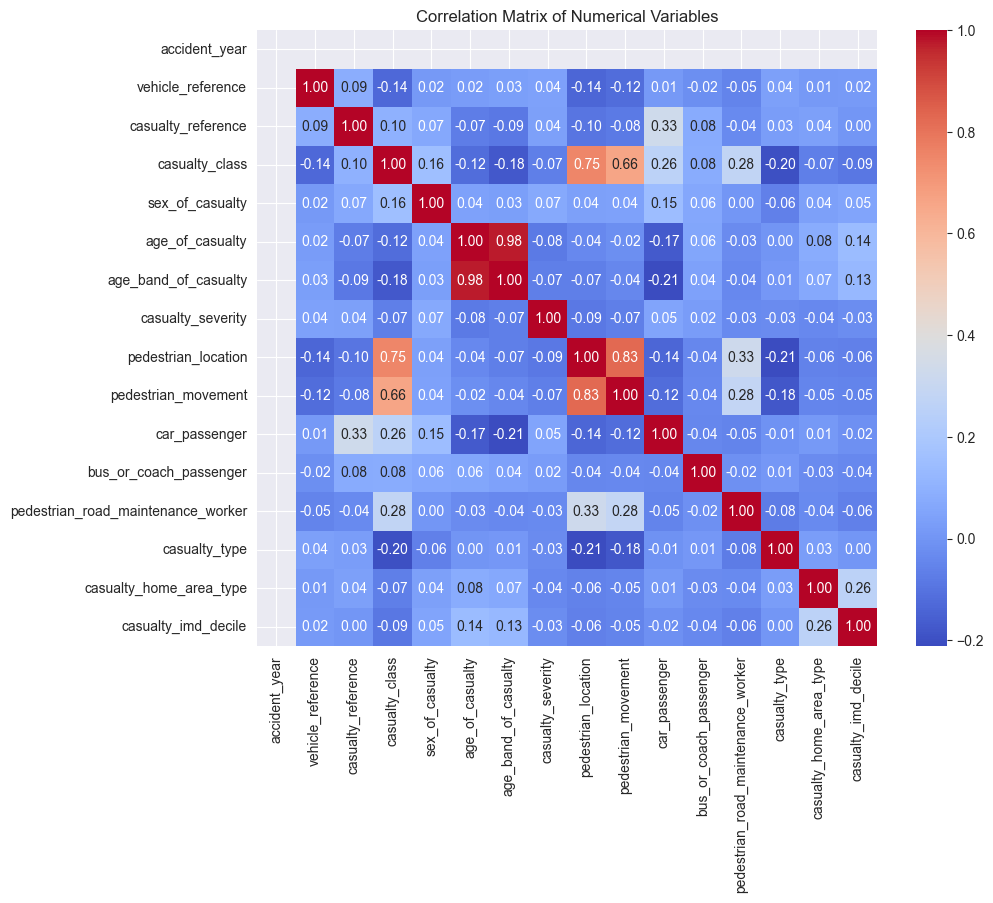

In [6]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()